# Project 001 
# Context
This project used Hypothesis Testing and Visualization to leverage customer's health information like smoking habits, bmi, age, and gender for checking statistical evidence to make valuable decisions of insurance business like charges for health insurance.


In [66]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set(color_codes=True)

from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro

In [2]:
#Read the data as a data frame

df = pd.read_csv('insurance.csv')

In [3]:
# Shape and Type of the DataFrame
df.shape

(1338, 7)

# EDA Analysis

There are 1338 Rows and 7 Columns

In [4]:
# Shape and Type of the DataFrame
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#EDA - Checking the presence of missing values

df.isnull().sum()

# Conclusion: There are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## There are no missing Values

In [16]:
## Alternate way to verify datatype and null or missing values # 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA - 5 point summary of numerical attributes
# 5 Points: Mean| Mode| 1st Quaterly| Median| 3rd Quaterly 

In [19]:
# Mean 
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [20]:
# Describe function shows 5 point summary for the DataFrame
# Excluding the columns with dtype 'Object'
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Alternatively we can calculate 5 points for EDA separately for each objects

In [6]:
print("\n Mean:\n",df.mean())


 Mean:
 age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64


In [10]:
print("\n Meadian:\n ", df.median())
print("====================")


 Meadian:
  age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


In [9]:
print("Mode for BMI:", df['bmi'].mode())
print("====================")

Mode for BMI: 0    32.3
dtype: float64


In [11]:
print("Mode for Age:", df['age'].mode())
print("====================");

Mode for Age: 0    18
dtype: int64


# Quantile 25%

In [12]:
print("Data_quantile(25%):",df.quantile(q=0.25))  # Prints the value below which 25% of the data lies
print("====================");

Data_quantile(25%): age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


# Quantile 50%

In [15]:
print("Data_quantile(50%):",df.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%): age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


# Quantile 75%

In [16]:
print("Data_quantile(75%):",df.quantile(q=0.75))  # Prints the value below which 75% of the data lies

Data_quantile(75%): age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


# IQR

In [17]:
df.quantile(q=0.75)-df.quantile(q=0.50)

age           12.000000
bmi            4.293750
children       1.000000
charges     7257.879515
dtype: float64

# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

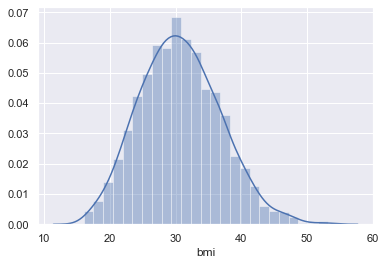

In [13]:
sns.distplot(df['bmi'],kde=True)

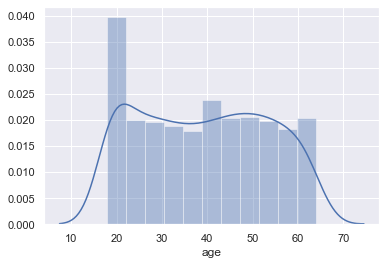

In [14]:
sns.distplot(df['age'],kde=True)

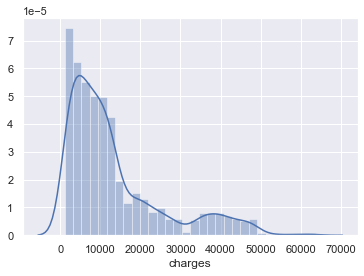

In [15]:
sns.distplot(df['charges'],kde=True)

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns



# Positively skewed: 
Most frequent values are low and tail is towards high values.
If Mode < Median < Mean then the distribution is positively skewed.

# Negatively skewed: 
Most frequent values are high and tail is towards low values.
If Mode> Median> Mean then the distribution is negatively skewed.

In [25]:
df['bmi'].skew()

0.2840471105987448

+ve skewed 

In [26]:
df['age'].skew()

0.05567251565299186

+ve Skewed

In [27]:
df['charges'].skew()

1.5158796580240388

+ve Skewed

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Age: Mean almost same as Median hence distribution is summetric with +ve skewness
2. BMI: Mean almost same as Median hence distribution is summetric with +ve skewness
3. Charges: Mean >> Median Right Skewed, 
4. Above can also be explained using BOXPLOT. 

# Presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns 

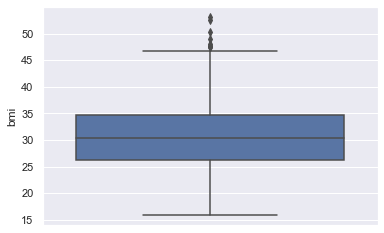

In [18]:
sns.boxplot(df['bmi'],orient='v')

we can observe from above graph that there are no extreme values / outliers for BMI.the data was equally distributed .

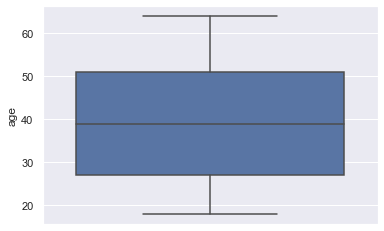

In [19]:
sns.boxplot(df['age'],orient='v')

we can observe from above graph that there are no extreme values / outliers for AGE.the data was equally distributed .

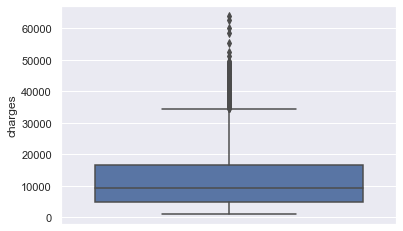

In [20]:
sns.boxplot(df['charges'],orient='v')

# we can observe from above graph that there are extreme values / outliers for the BMI and Charges. There are data beyond Q3 + 1.5IQR 

# Calculating Outliers for BMI, Age and Charges

In [28]:
#Boxplot shows outliers beyond Q3 whiskers for BMI, Age and Charges
#Q3+1.5*IQR
print("\n Outliers: \n", df.quantile(q=0.75)+1.5*(df.quantile(q=0.75)-df.quantile(q=0.255)))



 Outliers: 
 age            87.000000
bmi            47.134375
children        5.000000
charges     34431.701917
dtype: float64


# Distribution of categorical columns (include children)

In [32]:
#columns with categorical data
df_cat=df[['sex','smoker','children','region']]
df_cat.head()

,sex,smoker,children,region
0,female,yes,0,southwest
1,male,no,1,southeast
2,male,no,3,southeast
3,male,no,0,northwest
4,male,no,0,northwest


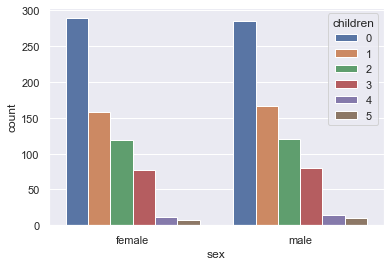

In [72]:
sns.countplot(data=df_cat,x='sex',hue='children');

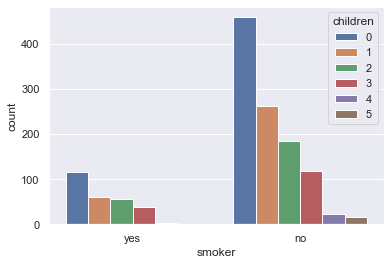

In [73]:
sns.countplot(data=df_cat,x='smoker', hue='children');

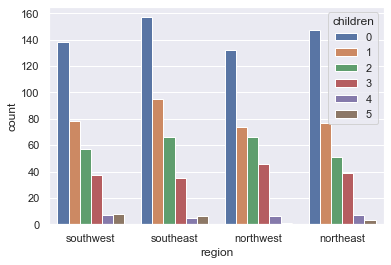

In [75]:
sns.countplot(data=df_cat,x='region', hue='children');

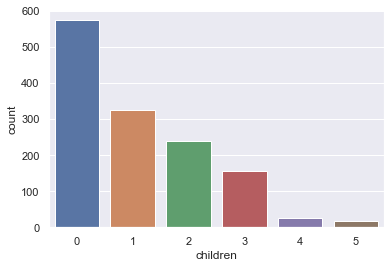

In [39]:
sns.countplot(data=df_cat,x='children');

# Above graph shows the distribution of Categorical Data including 'Children'

# 3 i) Pair plot that includes all the columns of the data frame 

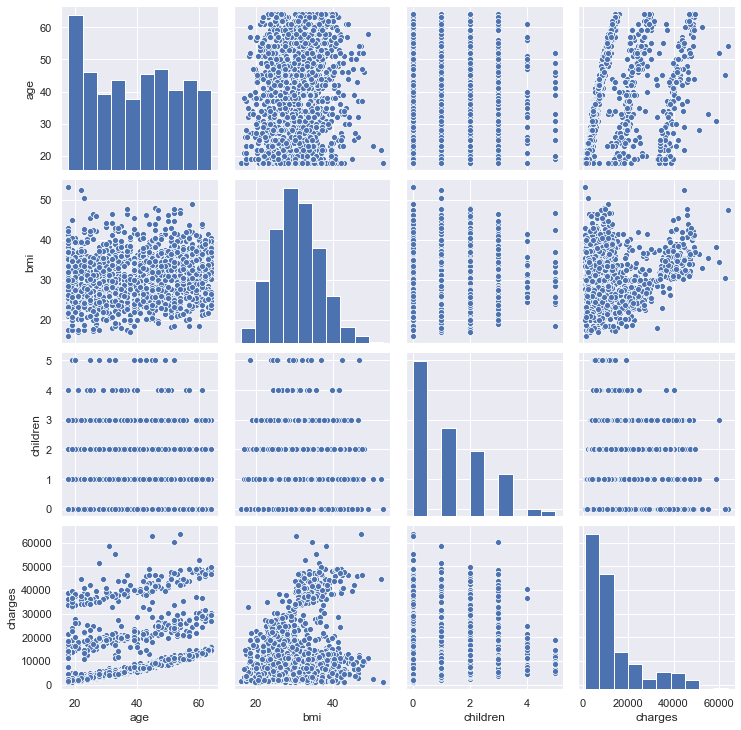

In [29]:
sns.pairplot(df)
plt.show()

# 4 a. Do charges of people who smoke differ significantly from the people who don't? 

In [49]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [56]:
df.groupby('smoker')['charges'].median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

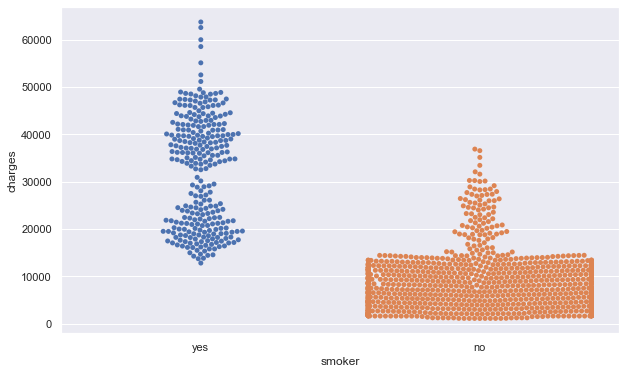

From the above graph is clearly evident that the charges significantly differ for a smoker and a non-smoker


In [65]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='smoker',y='charges',data=df[['smoker', 'charges']])
plt.show()
print("From the above graph is clearly evident that the charges significantly differ for a smoker and a non-smoker")

In [67]:
#Using Hypothesis Testing
# p value < 0.05 Reject the null hypothesis
# p value > 0.05 Accept the null hypothesis

ho = "charges of smokers does not differ significantly" # Null Hypothesis
ha = "charges of smokers differ significantly" # Alternate Hypothesis - This is what we need to verify

x = np.array(df[df.smoker == 'yes'].charges) # Smokers Charges
y = np.array(df[df.smoker == 'no'].charges) # Non Smokers Charges

t, p_value  = ttest_ind(x,y, axis = 0)  

print(p_value)


8.271435842177219e-283


# 4 b. Does bmi of males differ significantly from that of females?

In [51]:
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [55]:
df.groupby('sex')['bmi'].median()

sex
female    30.1075
male      30.6875
Name: bmi, dtype: float64

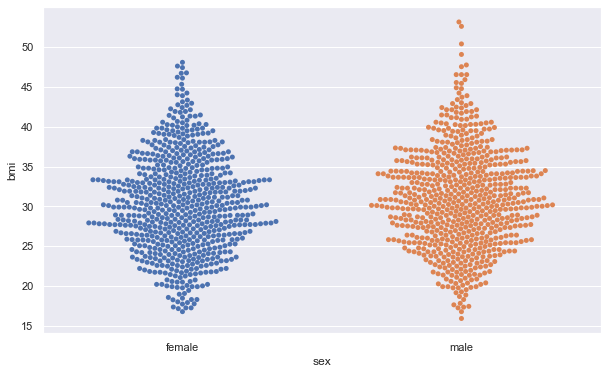

In [22]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='sex',y='bmi',data=df[['sex', 'bmi']])
plt.show()

No, the BMI doest not differ significantly

In [71]:
#Using Hypothesis Testing
# p value < 0.05 Reject the null hypothesis
# p value > 0.05 Accept the null hypothesis

ho = "BMI of Males does not differ significantly then Females" # Null Hypothesis
ha = "BMI of Males differs significantly then Females" # Alternate Hypothesis - This is what we need to verify

x = np.array(df[df.sex == 'female'].bmi) # Female BMI
y = np.array(df[df.sex == 'male'].bmi) # Male BMI

t, p_value  = ttest_ind(x,y, axis = 0)  

print(p_value)



0.08997637178984932


# 4 c. Is the proportion of smokers significantly different in different genders? 

In [90]:
#Proportion of smokers with the Gender.....
df_s= df[['sex','smoker']] 
df_s = df_s[df_s['smoker'] == 'yes'] # Male and Female Smokers

# Female and Male Smokers 

df_s_f, df_s_m = df_s[df_s.sex == 'female'].count(), df_s[df_s.sex == 'male'].count() 

print("Proportion of Male smoker is:    {0:.2f}".format(df_s_m['sex']/df_s['sex'].count()))
print("Proportion of Female smoker is:  {0:.2f}".format(df_s_f['sex']/df_s['sex'].count()))

Proportion of Male smoker is:    0.58
Proportion of Female smoker is:  0.42


From the above we can conclude that the proportion of smokers DOES NOT significantly different for male and female smokers

# 4 d. Is the distribution of bmi across women with no children, one child and two children, the same?

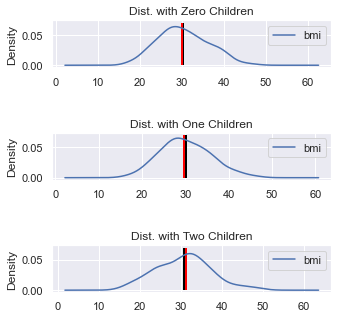

In [76]:
df_f = df[df.sex == 'female']
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(5,1,1)
ch0 = df_f[df_f.children == 0]
ch0[['bmi']].plot(kind="density", figsize=(5,5), ax=ax1,title='Dist. with Zero Children')
plt.vlines(ch0[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black') # Mean as BLACK Line
plt.vlines(ch0[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red') # Median as RED Line

ax2 = fig.add_subplot(5,1,3) 
ch1 = df_f[df_f.children == 1]
ch1[['bmi']].plot(kind="density", figsize=(5,5), ax=ax2, title='Dist. with One Children')
plt.vlines(ch1[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black') # Mean as BLACK Line
plt.vlines(ch1[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red') # Median as RED Line

ax3 = fig.add_subplot(5,1,5) 
ch2 = df_f[df_f.children == 2]
ch2[['bmi']].plot(kind="density", figsize=(5,5), ax=ax3,title='Dist. with Two Children')
plt.vlines(ch2[['bmi']].mean(), ymin=0, ymax=0.07, linewidth=2.0, color='black') # Mean as BLACK Line
plt.vlines(ch2[['bmi']].median(), ymin=0, ymax=0.07, linewidth=2.0, color='red') # Median as RED Line

Comparing boxplot for children =0,1 and 2 we can conlude distribution is almost identical. 

(<matplotlib.axes._subplots.AxesSubplot at 0x11ee98850>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ee98850>)

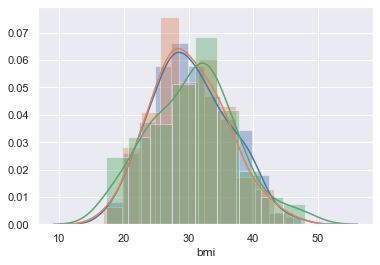

In [25]:
sns.distplot(df_f['bmi'][df.children==0]) , sns.distplot(df_f['bmi'][df.children==1]), sns.distplot(df_f['bmi'][df.children==2])

From the the above graph we can conclude that the distribution of BMI across women with 0, 1 and 2 children is same.